# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer,precision_recall_curve,auc,f1_score
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from google.colab import files
uploaded = files.upload()
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


# Data Summary

In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['UCI_Credit_Card.csv']))

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [7]:
data.duplicated().any()

False

In [8]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

# Data Cleaning

In [9]:
data.rename(columns={'default.payment.next.month':'default','PAY_0':'PAY_1'},inplace=True)

In [10]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

**SEX: (1=male, 2=female)**

In [11]:
fil = (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6) | (data['EDUCATION'] == 0)
data.loc[fil, 'EDUCATION'] = 4
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

**EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)**

In [12]:
data.loc[data['MARRIAGE']==0, 'MARRIAGE'] = 3
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

**MARRIAGE: Marital status (1=married, 2=single, 3=others)**

In [13]:
for i in range(1,7):
    col='PAY_'+str(i)
    fil = (data[col] == -2) | (data[col] == -1) 
    data.loc[fil, col] = 0

**REPAYMENT STATUS: (0=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)**

# Exploratary Data Analysis

In [14]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

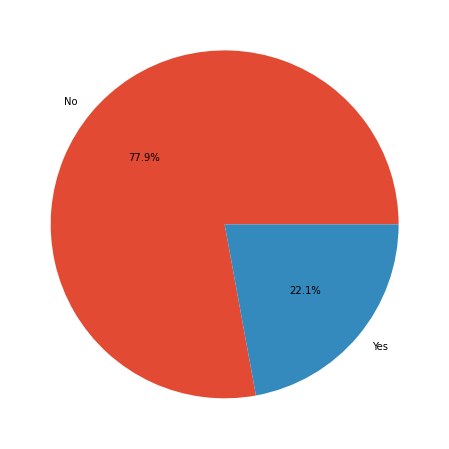

In [15]:
inter=data['default'].value_counts()
plt.pie(inter,labels=['No','Yes'],autopct='%0.1f%%',radius=1);

**There is imbalance in class distribution**

In [16]:
numeric_col=['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4',
             'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
             'PAY_AMT5', 'PAY_AMT6']

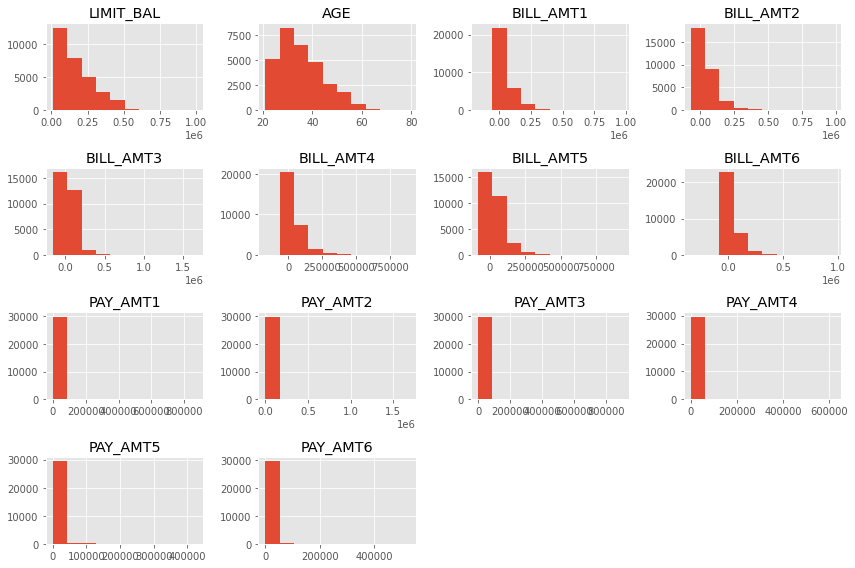

In [17]:
data[numeric_col].hist();
plt.tight_layout()

**The numrical features have non-gaussian distribution therefore we will use powertransform to make the features gaussian like.**

In [18]:
def num_plot(col):
    
    plt.subplot(1,2,1)
    sns.histplot(x=col,hue=data['default']);
    
    plt.subplot(1,2,2)
    sns.boxplot(y=col,x=data['default']);

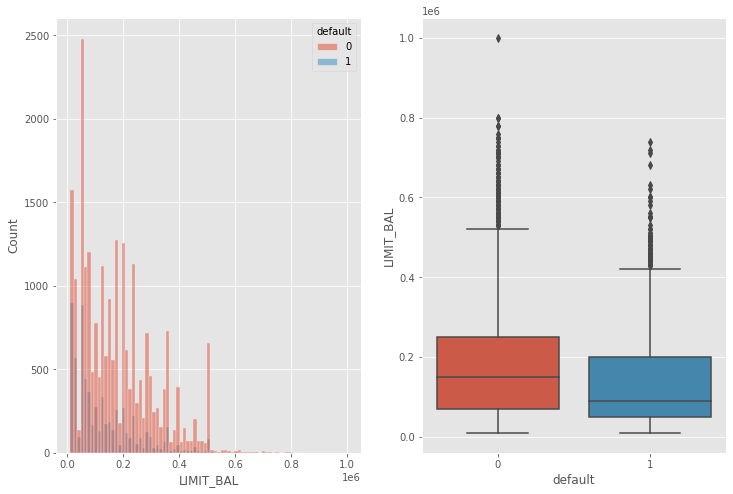

In [19]:
num_plot(data['LIMIT_BAL'])

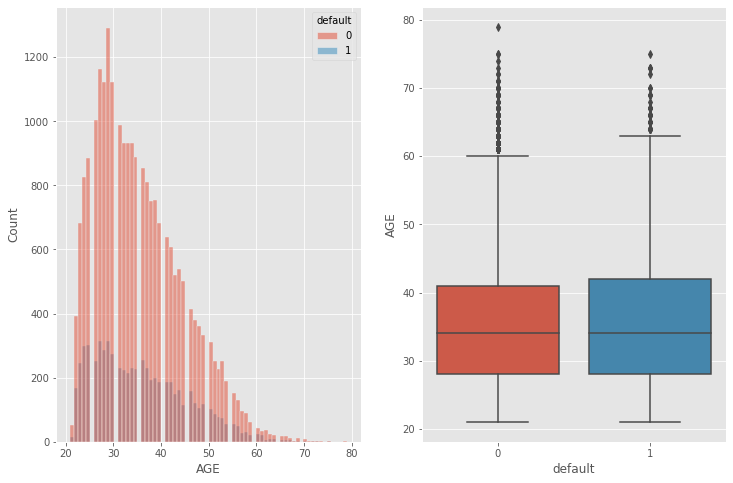

In [20]:
num_plot(data['AGE'])

**Age can be bined in bin size of 5 as can be seen from distribution plot**

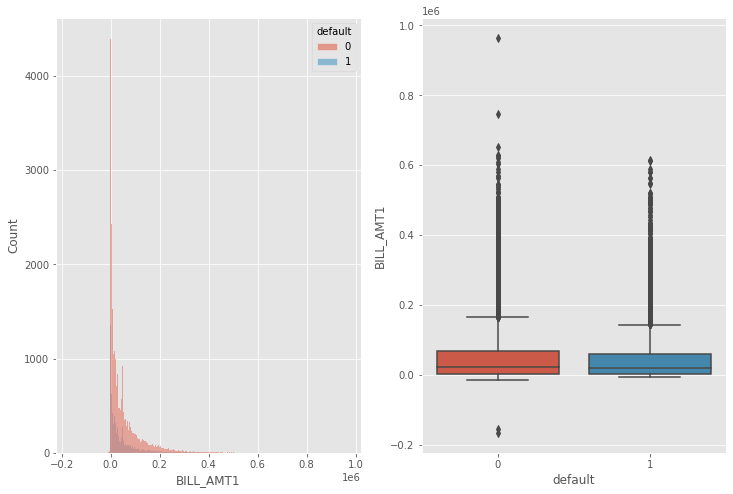

In [21]:
num_plot(data['BILL_AMT1'])

**Amount of bill statement follows similar pattern for others months**

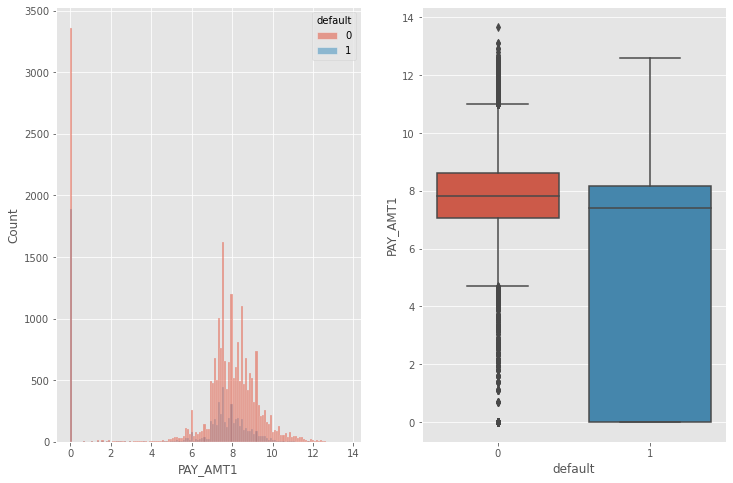

In [22]:
num_plot(np.log1p(data['PAY_AMT1']))

**Amount of previous payment follows similar pattern for other months**

**Numerical variable have non-gaussian distribution, therefore we will use power transformer to transform them to gaussian like.**

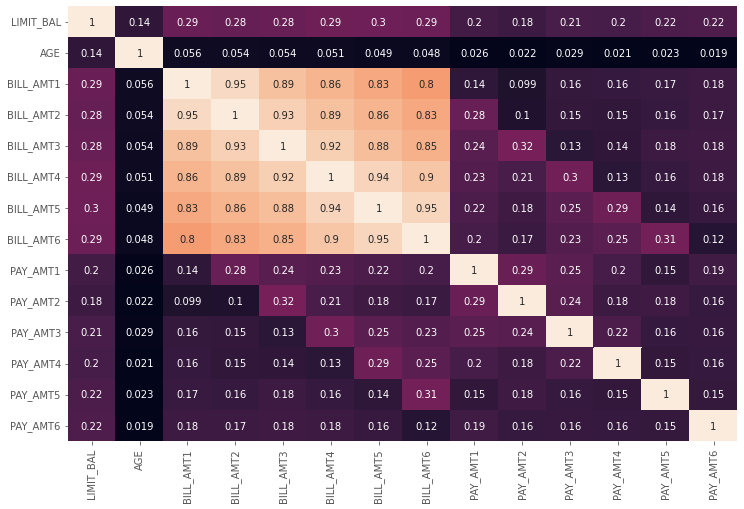

In [23]:
sns.heatmap(data[numeric_col].corr(),cbar=False,annot=True);

In [24]:
categorical_col=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1',
                 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [25]:
def cat_plot(col):
    
    inter=data.groupby(col)['default'].mean()
    
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=data,order=inter.index);
    
    plt.subplot(1,2,2)
    plt.pie(inter,labels=inter.index,autopct='%0.1f%%',radius=1.2);

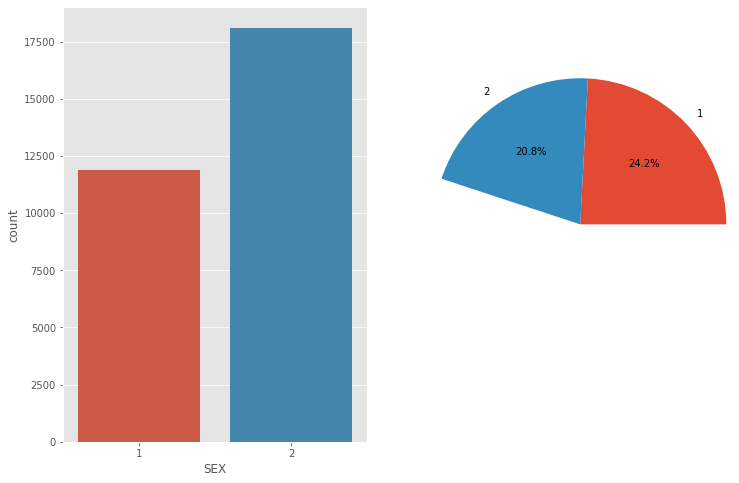

In [26]:
cat_plot('SEX')

**Males have a higher chance on defaulting on credit card bills then female**

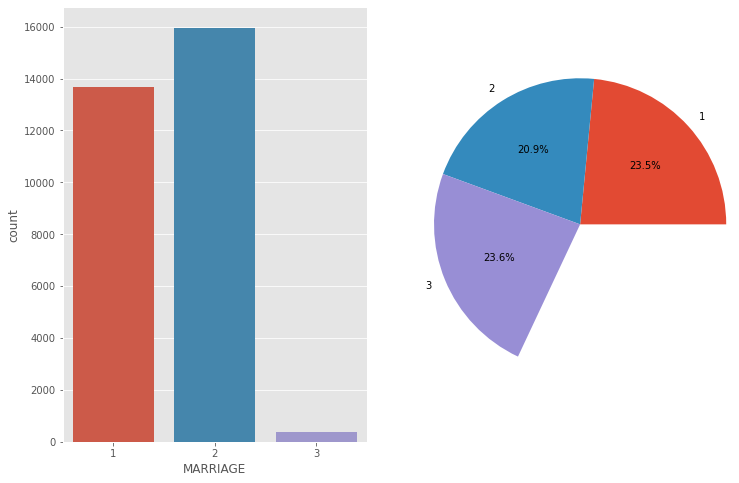

In [27]:
cat_plot('MARRIAGE')

**Single person have lower chances of defaulting.**

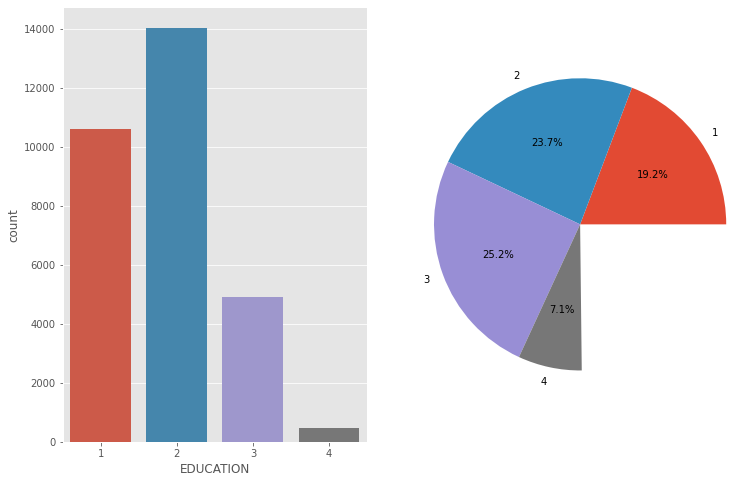

In [28]:
cat_plot('EDUCATION')

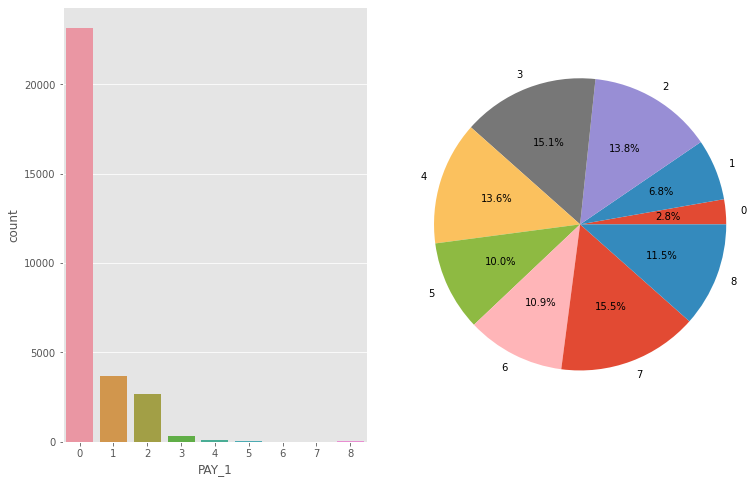

In [29]:
cat_plot('PAY_1')

**As the repayment status get delayed by 1 month, the chances of defaulting increases significantly.**

# Data Preprocessing

**Converting age into categorical variable**

In [30]:
data['AGE']=pd.cut(data['AGE'],bins=range(20,85,5),labels=range(len(range(20,85,5))-1))

In [31]:
X=data.drop(['ID','default'],axis=1)
y=data['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [32]:
numeric_col=['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4',
             'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
             'PAY_AMT5', 'PAY_AMT6']

categorical_col=['SEX','AGE', 'EDUCATION', 'MARRIAGE', 'PAY_1',
                 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [33]:
transformer=ColumnTransformer([('scaled',PowerTransformer(),numeric_col)],remainder='passthrough')
transformer.fit(X_train)

columns=numeric_col+categorical_col
X_train=pd.DataFrame(transformer.transform(X_train),columns=columns)
X_test=pd.DataFrame(transformer.transform(X_test),columns=columns)

# Evaluation Metric

**Identifying the defaulter is main task and therefore positive class is more important then negative class. Due to which we will area under the precision recall curve to determine the best model.**

In [34]:
def score(y_true,y_probs):
    precision,recall,_=precision_recall_curve(y_true,y_probs)
    return auc(recall,precision)

metric=make_scorer(score,needs_proba=True)

# Algorithm Spot Checking

In [35]:
def get_models():
    
    models,names=[],[]
    
    models.append(LogisticRegression())
    names.append('lr')
    
    models.append(KNeighborsClassifier())
    names.append('knn')
    
    models.append(GaussianNB())
    names.append('gnb')
    
    models.append(RandomForestClassifier())
    names.append('rfc')
    
    models.append(XGBClassifier())
    names.append('xgb')
    
    models.append(LGBMClassifier())
    names.append('lgb')
    
    return models,names

In [36]:
def evaluate(X,y):
    
    models,names=get_models()
    results=[]
    
    for i in range(len(models)):
        cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=1)
        scores=cross_val_score(models[i],X,y,scoring=metric,cv=cv)
        results.append(scores)
        
    plt.boxplot(results,labels=names,showmeans=True);

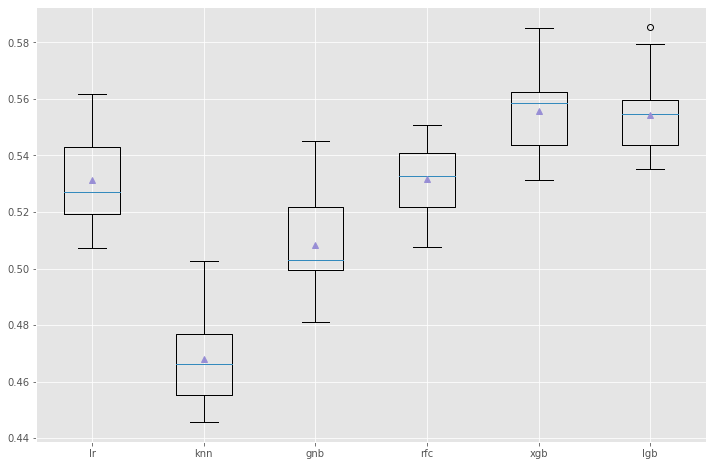

In [37]:
evaluate(X_train,y_train)

**LightGBM performs best among other algorithms.**

# Correcting Data Imbalance

**We will use undersampling technique for sampling data.Undersampling will remove majority class example from border area,therefore favouring prediction in minority class which is also the important.**

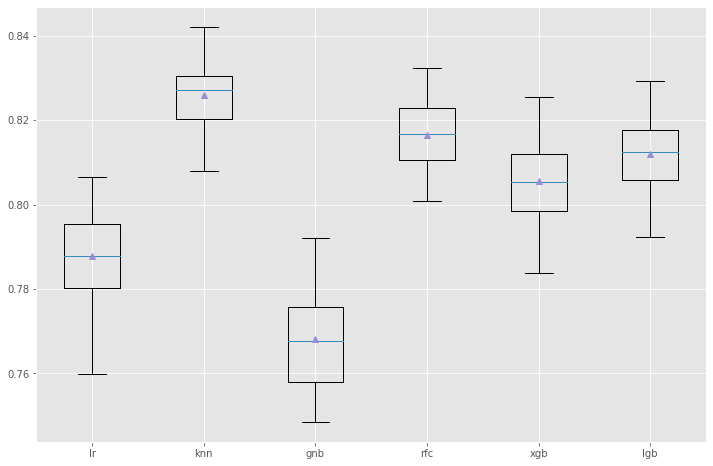

In [38]:
resample=EditedNearestNeighbours()
X_rs,y_rs=resample.fit_resample(X_train,y_train)

evaluate(X_rs,y_rs)

**Data sampling has increased models performance substanstially.Therefore we will use it**

In [39]:
X_train,y_train=X_rs,y_rs

**We will use Random Forest Classifier as our final model**

# Feature Selection

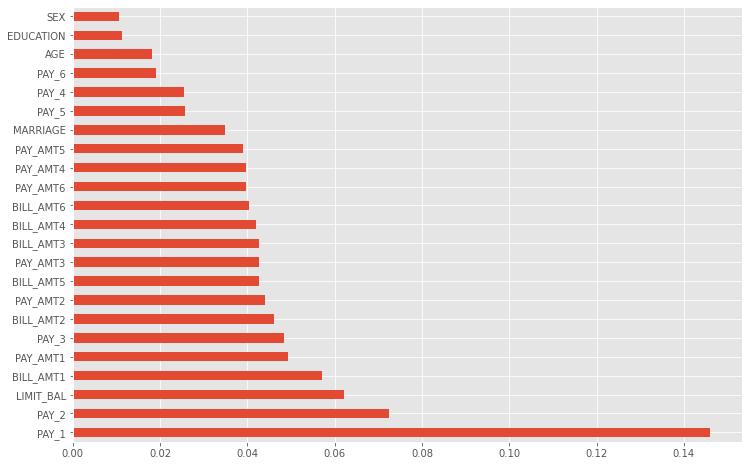

In [40]:
model=RandomForestClassifier()
model.fit(X_rs,y_rs)

fi=pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
fi.plot(kind='barh');

In [41]:
col=fi.index
col=col.to_list()

In [42]:
results=[]

for i in range(8,23):
    model=RandomForestClassifier()
    model.fit(X_train[col[:i]],y_train)
    y_probs=model.predict_proba(X_test[col[:i]])
    precision,recall,_=precision_recall_curve(y_test,y_probs[:,1])
    results.append(auc(recall,precision))

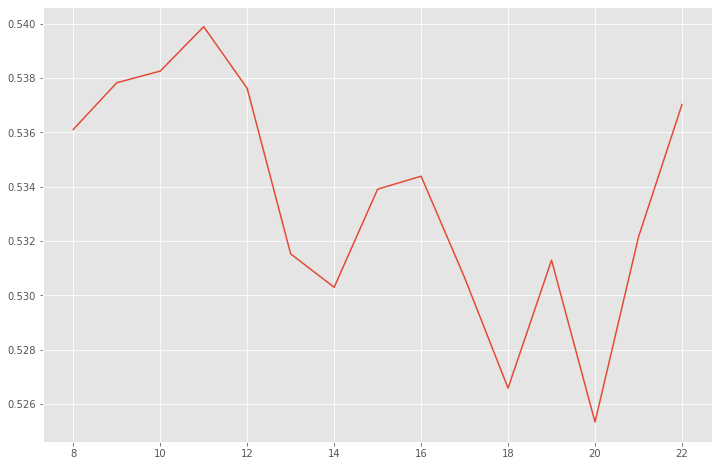

In [43]:
plt.plot([i for i in range(8,23)],results);

**We will select 10 features for the modelling**

In [44]:
#fs=features_selected
fs=['LIMIT_BAL','PAY_1','PAY_2','PAY_3','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3']

X_train=X_train[fs]
X_test=X_test[fs]

# Hyperparameter Optimization

In [45]:
param_grid={'n_estimators':range(100,150,10),
            'max_depth':range(3,8),
            'min_samples_split':range(2,10,2)}

cv=StratifiedKFold(n_splits=5)
model=GridSearchCV(RandomForestClassifier(),param_grid,scoring=metric,n_jobs=-1,cv=cv)
model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(100, 150, 10)},
             scoring=make_scorer(score, needs_proba=True))

In [46]:
model.best_params_

{'max_depth': 7, 'min_samples_split': 8, 'n_estimators': 110}

In [47]:
model.best_score_

0.7933934169779271

# Final Model

In [48]:
model=model.best_estimator_
y_probs=model.predict_proba(X_test)

In [49]:
precision,recall,thresholds=precision_recall_curve(y_test,y_probs[:,1])
print(f'Area under precision_recall_curve: {auc(recall,precision)}')

Area under precision_recall_curve: 0.5281617680983686


Text(0, 0.5, 'Precision')

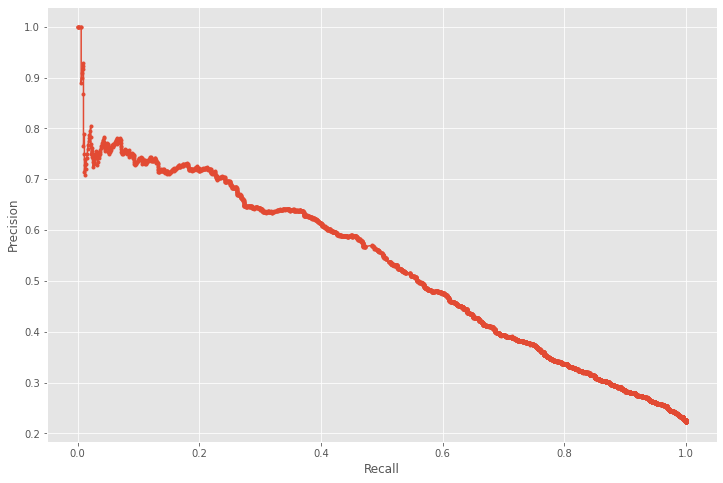

In [50]:
plt.plot(recall, precision, marker='.', label='RandomForestClassifier');

plt.xlabel('Recall')
plt.ylabel('Precision')

# Threshold Moving

In [51]:
f1_score = (5*precision*recall)/(4*precision+recall)
ix = np.argmax(f1_score)
thresh=thresholds[ix]

print('Best Threshold=%f, f1_score=%.3f' % (thresholds[ix], f1_score[ix]))

Best Threshold=0.189983, f1_score=0.633


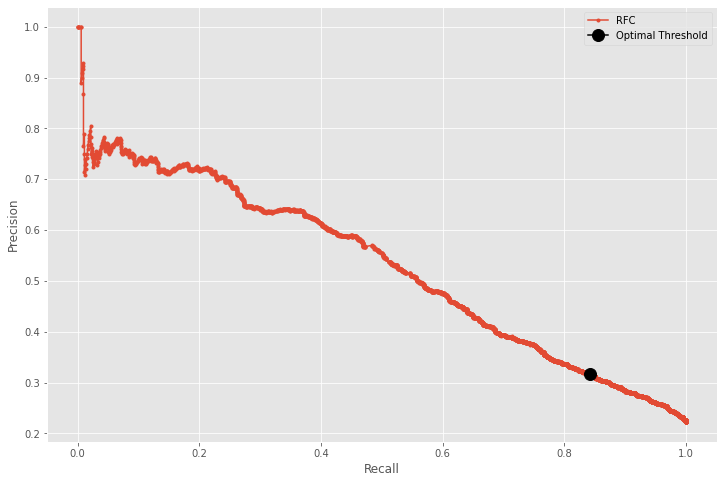

In [52]:
plt.plot(recall, precision, marker='.', label='RFC');
plt.plot(recall[ix],precision[ix],marker='o', markersize=12,color='black',label='Optimal Threshold');

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()

In [53]:
y_pred=(y_probs[:,1]>=thresh)

In [54]:
print(f'Classification_report: \n\n {classification_report(y_test,y_pred)}')

Classification_report: 

               precision    recall  f1-score   support

           0       0.92      0.49      0.64      4673
           1       0.32      0.84      0.46      1327

    accuracy                           0.56      6000
   macro avg       0.62      0.66      0.55      6000
weighted avg       0.78      0.56      0.60      6000



In [55]:
val=['Non-Defaulter','Defaulted']
data=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=val,index=val)


Text(51.0, 0.5, 'True Label')

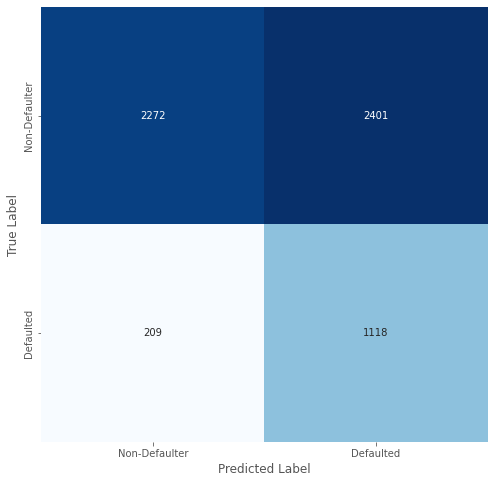

In [56]:
plt.figure(figsize=(8,8))

sns.heatmap(data,annot=True,cbar=False,cmap='Blues',fmt='g');
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

**We have been successful in decreasing the false negatives (defualters predicted as non-defaulters), achieving the recall of 0.85 for positive class**